In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("D:\\STAT628-Module3-Group2-main\\final_data.csv")

C:\Users\Kevin\AppData\Local\Temp\ipykernel_31892\462454466.py:1: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("D:\\STAT628-Module3-Group2-main\\Climatological-Data\\final_data.csv")


In [ ]:

for col in data.select_dtypes(include=['object']).columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

print(data.dtypes)

airline_type                                    int64
FlightDuration_Minutes                        float64
DepAirport                                      int64
ArrAirport                                      int64
DayOfWeek                                       int64
CRSTimeOfDay_Dep                                int64
CRSTimeOfDay_Arr                                int64
Month                                           int64
CRSDepTime_Origin_skycond                     float64
CRSArrTime_Dest_skycond                       float64
CRSDepTime_Origin_HourlyRelativeHumidity      float64
CRSArrTime_Dest_HourlyRelativeHumidity        float64
CRSDepTime_Origin_HourlyDryBulbTemperature    float64
CRSArrTime_Dest_HourlyDryBulbTemperature      float64
CRSDepTime_Origin_HourlyWindSpeed             float64
CRSArrTime_Dest_HourlyWindSpeed               float64
CRSDepTime_Origin_HourlyVisibility            float64
CRSArrTime_Dest_HourlyVisibility              float64
Cancelled                   

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder


conditions = [
   
    (data['ArrDelay'] > 45),
    (data['ArrDelay'] > 15) & (data['ArrDelay'] <= 45),
    (data['ArrDelay'] > 0) & (data['ArrDelay'] <= 15),
    (data['ArrDelay'] >= -15) & (data['ArrDelay'] <= 0),
    (data['ArrDelay'] >= -45) & (data['ArrDelay'] < -15),
    (data['ArrDelay'] < -45),

   
]

choices = [
    'large delay',    # > 45
  
    'medium delay',       # 15-45
    'small delay',          # 0 ~15
    'small early',          # -15 ~ -0
    'medium early',       # -45 ~ -15
    'large early'     # < -45
]


data['Delay_type'] = np.where(
    data['Cancelled'] == 1,
    'Cancelled',
    np.select(conditions, choices, default='unknown')
)


label_encoder = LabelEncoder()
data['Delay_type_encoded'] = label_encoder.fit_transform(data['Delay_type'])


print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


{'Cancelled': 0, 'large delay': 1, 'large early': 2, 'medium delay': 3, 'medium early': 4, 'small delay': 5, 'small early': 6, 'unknown': 7}


In [ ]:

data = data[data['Delay_type'] != 'unknown'].reset_index(drop=True)


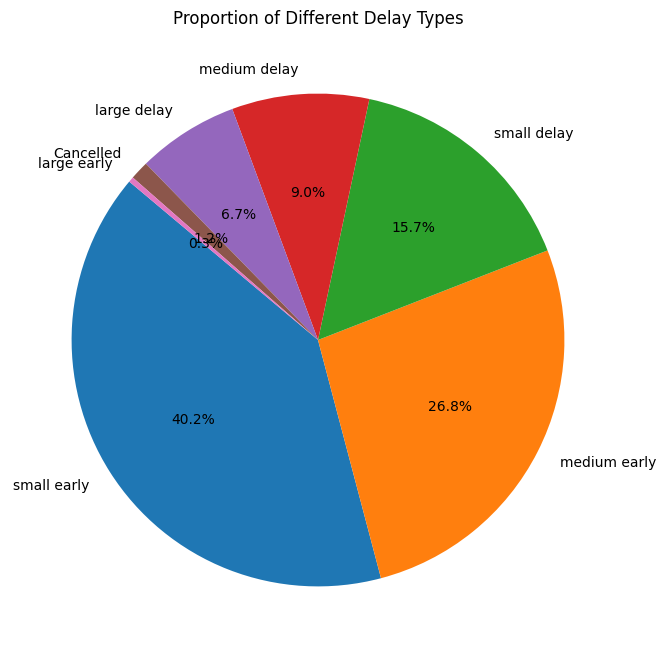

In [ ]:
import matplotlib.pyplot as plt

category_counts = data['Delay_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Different Delay Types')
plt.savefig("Proportion of Different Delay Types.png", format="png", dpi=300)
plt.show()


In [ ]:

category_counts = data['Delay_type'].value_counts()
category_percentages = (category_counts / len(data)) * 100

category_summary = pd.DataFrame({
    'Count': category_counts,
    'Percentage (%)': category_percentages
})
print(category_summary)


                Count  Percentage (%)
Delay_type                           
small early   3272647       40.225793
medium early  2180954       26.807231
small delay   1280072       15.734025
medium delay   732262        9.000610
large delay    541237        6.652623
Cancelled      100060        1.229889
large early     28461        0.349829


In [ ]:
from collections import Counter


X = data.drop(columns=['Cancelled','ArrDelay','Delay_type','Delay_type_encoded'])  #
y = data['Delay_type_encoded']  


X = X.dropna()
y = y.loc[X.index]  




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# 将 X 和 y 合并为一个 DataFrame 方便处理
data = X.copy()
data['Delay_type_encoded'] = y  # 假设 'Delay_type_encoded' 是目标特征名称


resampled_data = []

#resample
for label in data['Delay_type_encoded'].unique():
   
    class_data = data[data['Delay_type_encoded'] == label]
    
    resampled_class_data = resample(
        class_data, 
        replace=True,         
        n_samples=28461,      
        random_state=42
    )
    

    resampled_data.append(resampled_class_data)


balanced_data = pd.concat(resampled_data, axis=0)


X_balanced = balanced_data.drop(columns=['Delay_type_encoded'])
y_balanced = balanced_data['Delay_type_encoded']


X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, 
    y_balanced, 
    test_size=0.2,      
    random_state=42,
    stratify=y_balanced   
)


Optimizing Random Forest...
Optimizing XGBoost...
Optimizing LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1370
[LightGBM] [Info] Number of data points in the train set: 159381, number of used features: 18
[LightGBM] [Info] Start training from score -1.945898
[LightGBM] [Info] Start training from score -1.945898
[LightGBM] [Info] Start training from score -1.945898
[LightGBM] [Info] Start training from score -1.945942
[LightGBM] [Info] Start training from score -1.945898
[LightGBM] [Info] Start training from score -1.945898
[LightGBM] [Info] Start training from score -1.945942
Accuracy:
            Model  Accuracy
0  Random Forest  0.395171
1        XGBoost  0.385359
2       LightGBM  0.383527
F1 Score:
            Model  F1 Score
0  Random Forest  0.375899
1        XG

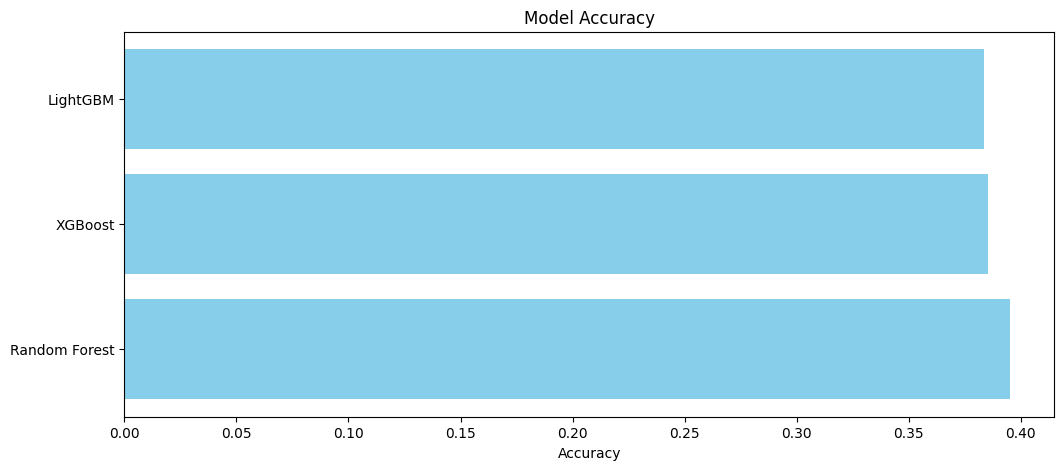

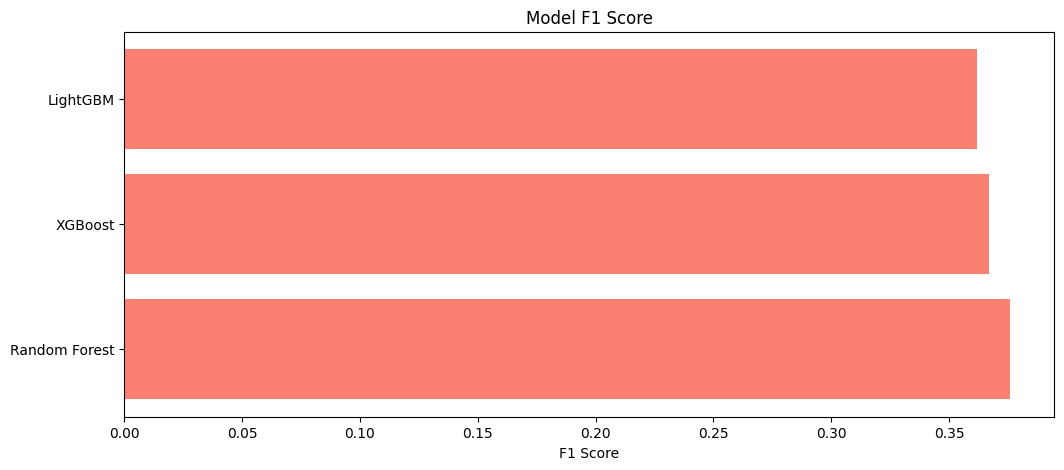

In [ ]:
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05],
        'max_depth': [3, 6, 10]
    },
    'LightGBM': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05],
        'num_leaves': [30, 50, 100]
    }
}


accuracy_scores = {}
f1_scores = {}


for name, model in base_models.items():
    print(f"Optimizing {name}...")
    
  
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        scoring='accuracy',  
        cv=3,                
        n_jobs=-1            
    )
    
   
    grid_search.fit(X_train_balanced, y_train_balanced)
    
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_balanced)
    
   
    accuracy = accuracy_score(y_test_balanced, y_pred)
    f1 = f1_score(y_test_balanced, y_pred, average='macro')
    
   
    accuracy_scores[name] = accuracy
    f1_scores[name] = f1


accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])
f1_df = pd.DataFrame(list(f1_scores.items()), columns=['Model', 'F1 Score'])


print("Accuracy:\n", accuracy_df)
print("F1 Score:\n", f1_df)


plt.figure(figsize=(12, 5))
plt.barh(accuracy_df['Model'], accuracy_df['Accuracy'], color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Accuracy")
plt.show()

plt.figure(figsize=(12, 5))
plt.barh(f1_df['Model'], f1_df['F1 Score'], color='salmon')
plt.xlabel("F1 Score")
plt.title("Model F1 Score")
plt.show()





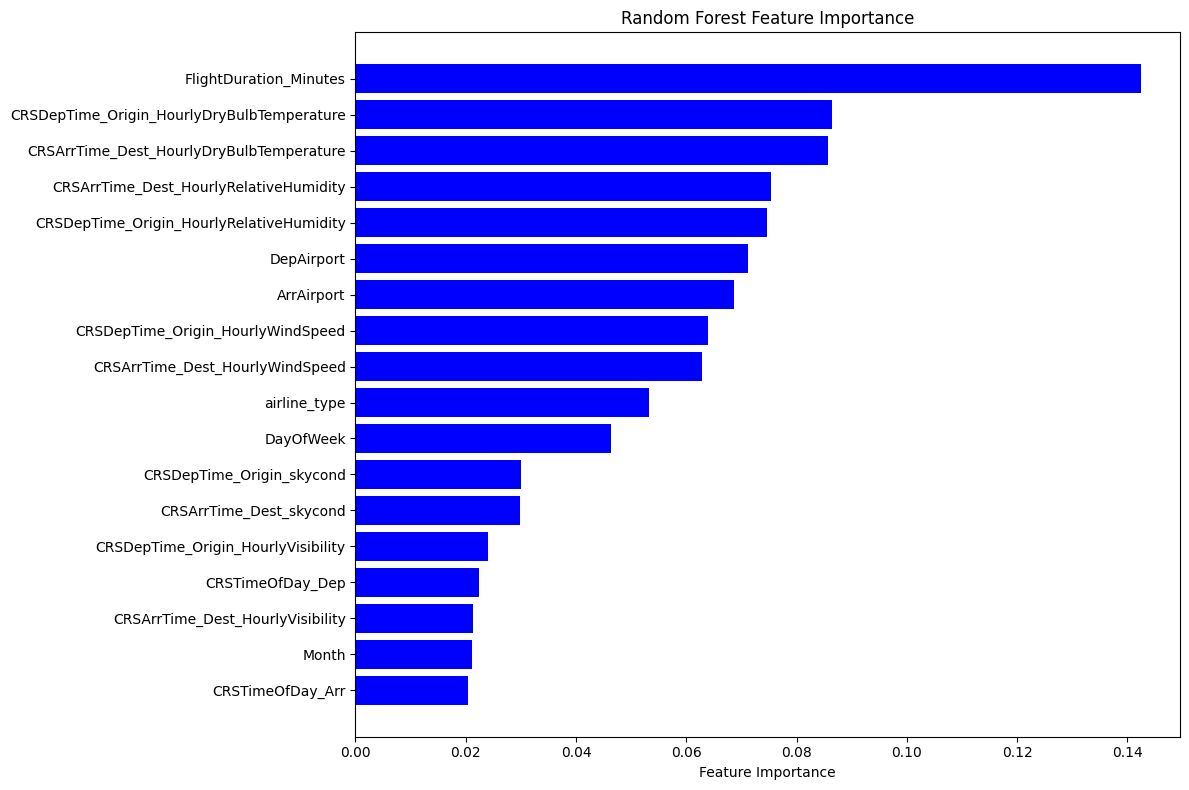

In [211]:
# 绘制特征重要性横向柱状图
plt.figure(figsize=(12, 8))
plt.barh(features_df['Feature'], features_df['Importance'], color='blue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')

# 自动调整布局，避免文字被截断
plt.tight_layout()

# 保存图片为 PNG 格式
plt.savefig("random_forest_feature_importance.png", format="png", dpi=300)

# 显示图表
plt.show()

